In [18]:
import tarfile
import gzip
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the files

In [19]:
'''archive_files = ['dataset/BeerAdvocate.tar.gz', 'dataset/matched_beer_data.tar.gz', 'dataset/RateBeer.tar.gz']

# Iterate through the list of archive files
for archive_file in archive_files:
    print(f"Extracting and decompressing files from {archive_file} ...")
    
    # Create a directory to store the extracted files
    extraction_dir = archive_file.replace('.tar.gz', '')
    os.makedirs(extraction_dir, exist_ok=True)
    
    # Open the archive
    with tarfile.open(archive_file, 'r:gz') as tar:
        # Get a list of file names in the archive
        file_list = tar.getnames()
        
        # Extract all the files from the archive
        for file_to_extract in file_list:
            tar.extract(file_to_extract, path=extraction_dir)
            
            # If the extracted file is a ".gz" file, decompress it
            if file_to_extract.endswith('.gz'):
                gz_file_path = os.path.join(extraction_dir, file_to_extract)
                decompressed_file_path = gz_file_path.replace('.gz', '')
                with gzip.open(gz_file_path, 'rb') as gz_file:
                    with open(decompressed_file_path, 'wb') as decompressed_file:
                        shutil.copyfileobj(gz_file, decompressed_file)
    '''

'archive_files = [\'dataset/BeerAdvocate.tar.gz\', \'dataset/matched_beer_data.tar.gz\', \'dataset/RateBeer.tar.gz\']\n\n# Iterate through the list of archive files\nfor archive_file in archive_files:\n    print(f"Extracting and decompressing files from {archive_file} ...")\n    \n    # Create a directory to store the extracted files\n    extraction_dir = archive_file.replace(\'.tar.gz\', \'\')\n    os.makedirs(extraction_dir, exist_ok=True)\n    \n    # Open the archive\n    with tarfile.open(archive_file, \'r:gz\') as tar:\n        # Get a list of file names in the archive\n        file_list = tar.getnames()\n        \n        # Extract all the files from the archive\n        for file_to_extract in file_list:\n            tar.extract(file_to_extract, path=extraction_dir)\n            \n            # If the extracted file is a ".gz" file, decompress it\n            if file_to_extract.endswith(\'.gz\'):\n                gz_file_path = os.path.join(extraction_dir, file_to_extract)\n    

In [20]:
dataset_dir = 'dataset' 
csv_files = []
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        file_path = os.path.join(root, file)
        file_extension = file_path.split('.')[-1].lower()
        if file_extension == 'csv':
            df = pd.read_csv(file_path)
            csv_files.append((df, file_path))




C:\Users\danak\AppData\Local\Temp\ipykernel_13388\2872058188.py:8: DtypeWarning: Columns (0,1,2,3,4,5,8,10,11,12,13,15,16,17,18,19,20,23,25,26,27,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\danak\AppData\Local\Temp\ipykernel_13388\2872058188.py:8: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [21]:
BeerAdvocate = csv_files[0:3]
matched_beer_data = csv_files[3:8]
RateBeer = csv_files[8:11]

print(f"Number of csv files: {len(csv_files)}")
print(f"Number of csv files in BeerAdvocate: {len(BeerAdvocate)}")
print(f"Number of csv files in matched_beer_data: {len(matched_beer_data)}")
print(f"Number of csv files in RateBeer: {len(RateBeer)}")


Number of csv files: 11
Number of csv files in BeerAdvocate: 3
Number of csv files in matched_beer_data: 5
Number of csv files in RateBeer: 3


In [22]:
# Rename the columns of each dataframe in matched_beer_data by the names in row 0
for i, (df, name) in enumerate(matched_beer_data):
    df.columns = df.iloc[0]
    df = df[1:] # Remove row 0
    df.reset_index(drop=True, inplace=True)

# General Information on the Files

In [23]:
'''
for i, (df, name) in enumerate(csv_files):
    print(f"DataFrame {i} = {name} - First Few Rows:")
    print(df.head(5))
    print("\n")
'''

'\nfor i, (df, name) in enumerate(csv_files):\n    print(f"DataFrame {i} = {name} - First Few Rows:")\n    print(df.head(5))\n    print("\n")\n'

In [24]:
'''
for i, (df, name) in enumerate(csv_files):
    print(f"__DataFrame {i} = {name}")
    print(df.columns)
    print("\n")
'''

'\nfor i, (df, name) in enumerate(csv_files):\n    print(f"__DataFrame {i} = {name}")\n    print(df.columns)\n    print("\n")\n'

In [25]:
'''
for i, (df, name) in enumerate(csv_files):
    print(f"__DataFrame {i} = {name}")
    print(df.describe())
    print(df.info())
    print("\n")
'''

'\nfor i, (df, name) in enumerate(csv_files):\n    print(f"__DataFrame {i} = {name}")\n    print(df.describe())\n    print(df.info())\n    print("\n")\n'

##  Analysis of the beers in BeerAdvocate

Goal: See if there is any notable difference in the rating of beers between the two datasets. 

Observation: Ratings tend to be lower in RateBeer 

Todo: See if a person tend to give lower rating in RateBeer than in AdvocateBeer. If people tend to be more harsh on RateBeer and if this has an influence on how users rate beers on AdvocateBeer and on RateBeer, then maybe this has to be taken into consideration when comparing reviews from both datasets.

In [26]:
df0 = BeerAdvocate[0][0]
df1 = RateBeer[0][0]
common_columns = []
for col in df0.columns:
    if col in df1.columns:
        common_columns.append(col)
print(f"Common columns between BeerAdvocate and RateBeer: {common_columns}")

Common columns between BeerAdvocate and RateBeer: ['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'nbr_ratings', 'avg', 'abv', 'avg_computed', 'zscore', 'nbr_matched_valid_ratings', 'avg_matched_valid_ratings']


### Distribution of beer ratings

Number of beers in BeerAdvocate: 280823
Number of beers in RateBeer: 442081


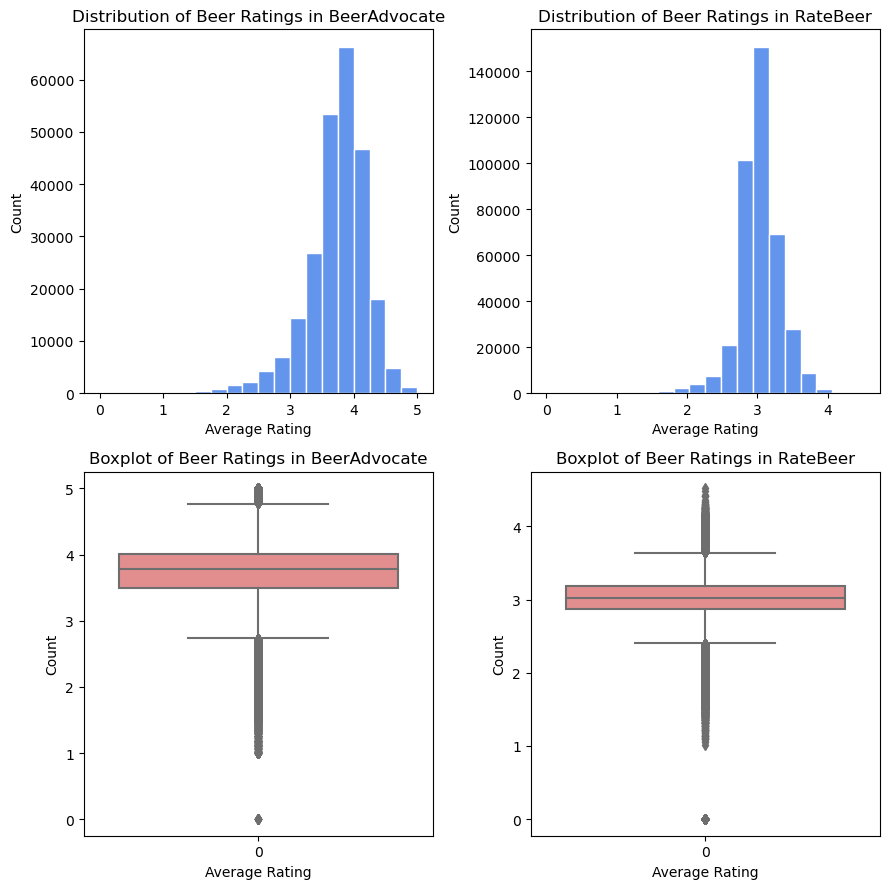

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# Number of beers in BeerAdvocate and RateBeer
print("Number of beers in BeerAdvocate:", len(df0))
print("Number of beers in RateBeer:", len(df1))

# BeerAdvocate - Histogram
axes[0, 0].hist(df0['avg'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 0].set_xlabel('Average Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Beer Ratings in BeerAdvocate')

# RateBeer - Histogram
axes[0, 1].hist(df1['avg'], bins=20, color='cornflowerblue', edgecolor='white')
axes[0, 1].set_xlabel('Average Rating')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Beer Ratings in RateBeer')

# BeerAdvocate - Boxplot
sns.boxplot(df0['avg'], ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_xlabel('Average Rating')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Boxplot of Beer Ratings in BeerAdvocate')

# RateBeer - Boxplot
sns.boxplot(df1['avg'], ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Boxplot of Beer Ratings in RateBeer')

plt.tight_layout()
plt.show()


The distribution function across the two dataset has a similar shape but the ratings are lower on average in RateBeers

### Distribution of Average Rating per Beer Style

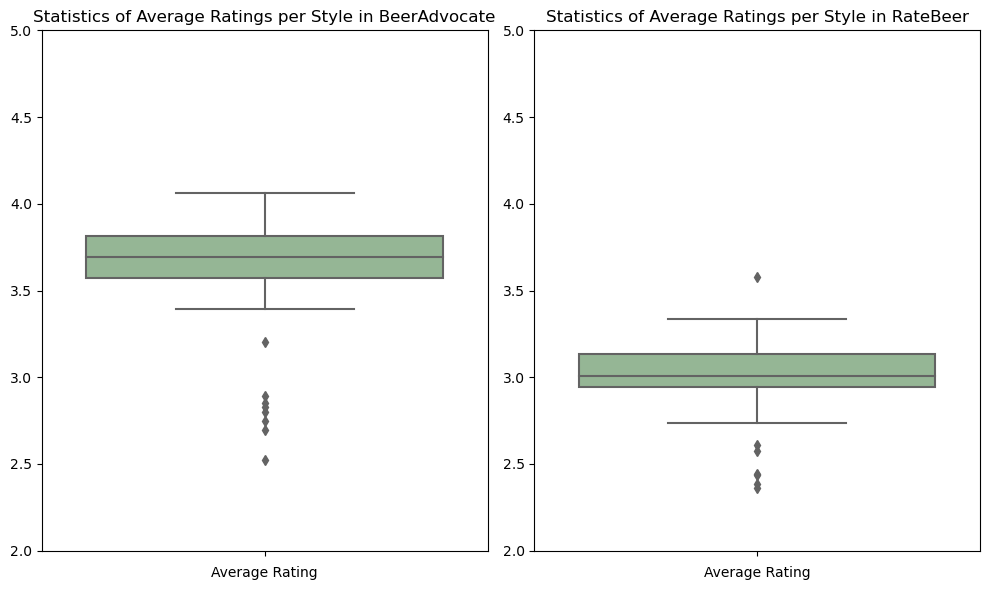

In [28]:
avg_ratings_by_style_df0 = df0.groupby('style')['avg'].mean().sort_values(ascending=False)
avg_ratings_by_style_df1 = df1.groupby('style')['avg'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# BeerAdvocate
sns.boxplot(y=avg_ratings_by_style_df0.values, ax=axes[0], color='darkseagreen')
axes[0].set_xlabel('Average Rating')
axes[0].set_title('Statistics of Average Ratings per Style in BeerAdvocate')
axes[0].set_ylim(2, 5)

# RateBeer
sns.boxplot(y=avg_ratings_by_style_df1.values, ax=axes[1], color='darkseagreen')
axes[1].set_xlabel('Average Rating')
axes[1].set_title('Statistics of Average Ratings per Style in RateBeer')
axes[1].set_ylim(2, 5)
plt.tight_layout()
plt.show()

#### Top Beer Styles by Average Rating

Number of Beer Styles in AdvocateBeer: 104
Number of Beer Styles in RateBeer: 94


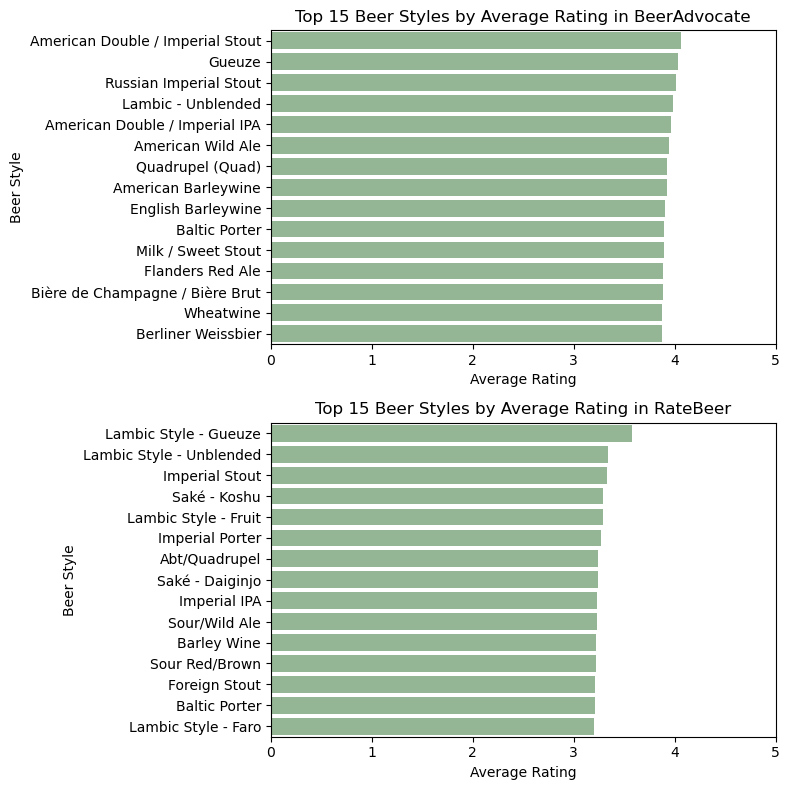

In [29]:
avg_ratings_by_style_df0 = df0.groupby('style')['avg'].mean().sort_values(ascending=False)
avg_ratings_by_style_df1 = df1.groupby('style')['avg'].mean().sort_values(ascending=False)

print(f"Number of Beer Styles in AdvocateBeer: {len(avg_ratings_by_style_df0)}")
print(f"Number of Beer Styles in RateBeer: {len(avg_ratings_by_style_df1)}")

x = 15 # Number of top beer styles to plot

fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# BeerAdvocate
sns.barplot(x=avg_ratings_by_style_df0.head(x).values, y=avg_ratings_by_style_df0.head(x).index, color='darkseagreen', ax=axes[0])
axes[0].set_xlim(0, 5)
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Beer Style')
axes[0].set_title(f'Top {x} Beer Styles by Average Rating in BeerAdvocate')

# RateBeer
sns.barplot(x=avg_ratings_by_style_df1.head(x).values, y=avg_ratings_by_style_df1.head(x).index, color='darkseagreen', ax=axes[1])
axes[1].set_xlim(0, 5)
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Beer Style')
axes[1].set_title(f'Top {x} Beer Styles by Average Rating in RateBeer')

plt.tight_layout()
plt.show()



The top 15 beer styles differ across the two dataset and those in the RateBeer dataset, and overall average rating across the beer style is lower in the RateBeer dataset (even for the same beer style)

### Most Represented Beer Styles and Ranking with respect to Average Rating


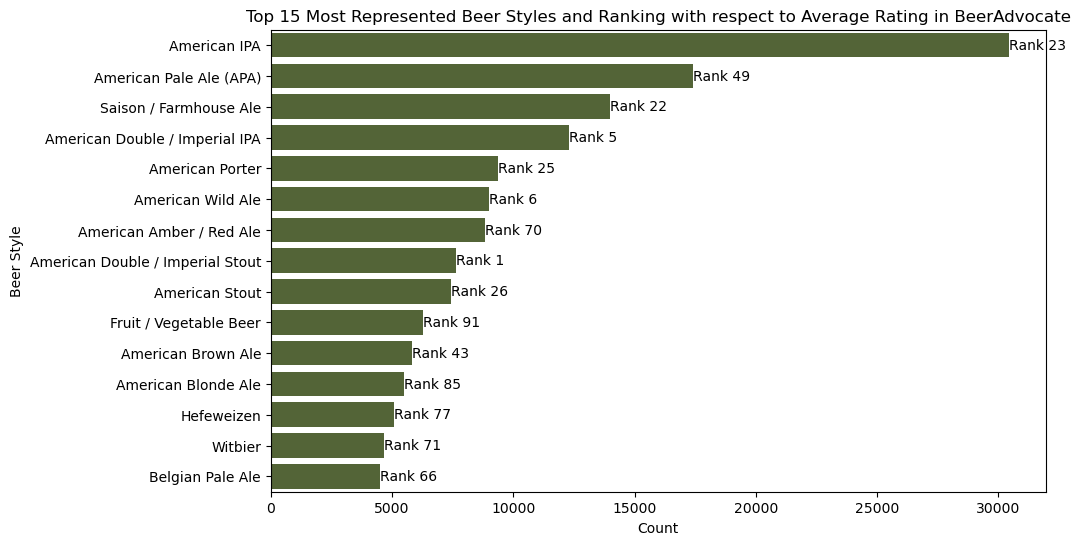

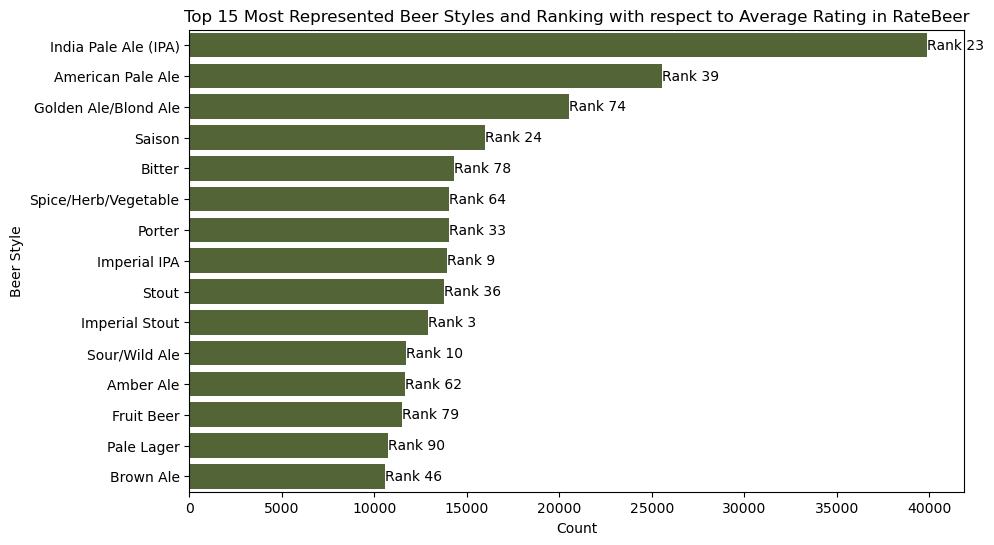

In [30]:
x = 15 # Number of top beer styles to plot

# BeerAdvocate
plt.figure(figsize=(10, 6))
plot = sns.countplot(y='style', data=df0, order=df0['style'].value_counts().index[:x], color ='darkolivegreen')
for i, style in enumerate(df0['style'].value_counts().index[:x]):
    ranking = avg_ratings_by_style_df0.index.get_loc(style) + 1  
    plot.text(df0['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
plt.xlabel('Count')
plt.ylabel('Beer Style')
plt.title('Top 15 Most Represented Beer Styles and Ranking with respect to Average Rating in BeerAdvocate')
plt.show()

# RateBeer
plt.figure(figsize=(10, 6))
plot = sns.countplot(y='style', data=df1, order=df1['style'].value_counts().index[:x], color ='darkolivegreen')
for i, style in enumerate(df1['style'].value_counts().index[:x]):
    ranking = avg_ratings_by_style_df1.index.get_loc(style) + 1  
    plot.text(df1['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
plt.xlabel('Count')
plt.ylabel('Beer Style')
plt.title('Top 15 Most Represented Beer Styles and Ranking with respect to Average Rating in RateBeer')
plt.show()

Todo: This but for each period  of the year?

### Distribution of the Alcohol by Volume and Average Rating for each Alcohol by Volume Bins


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


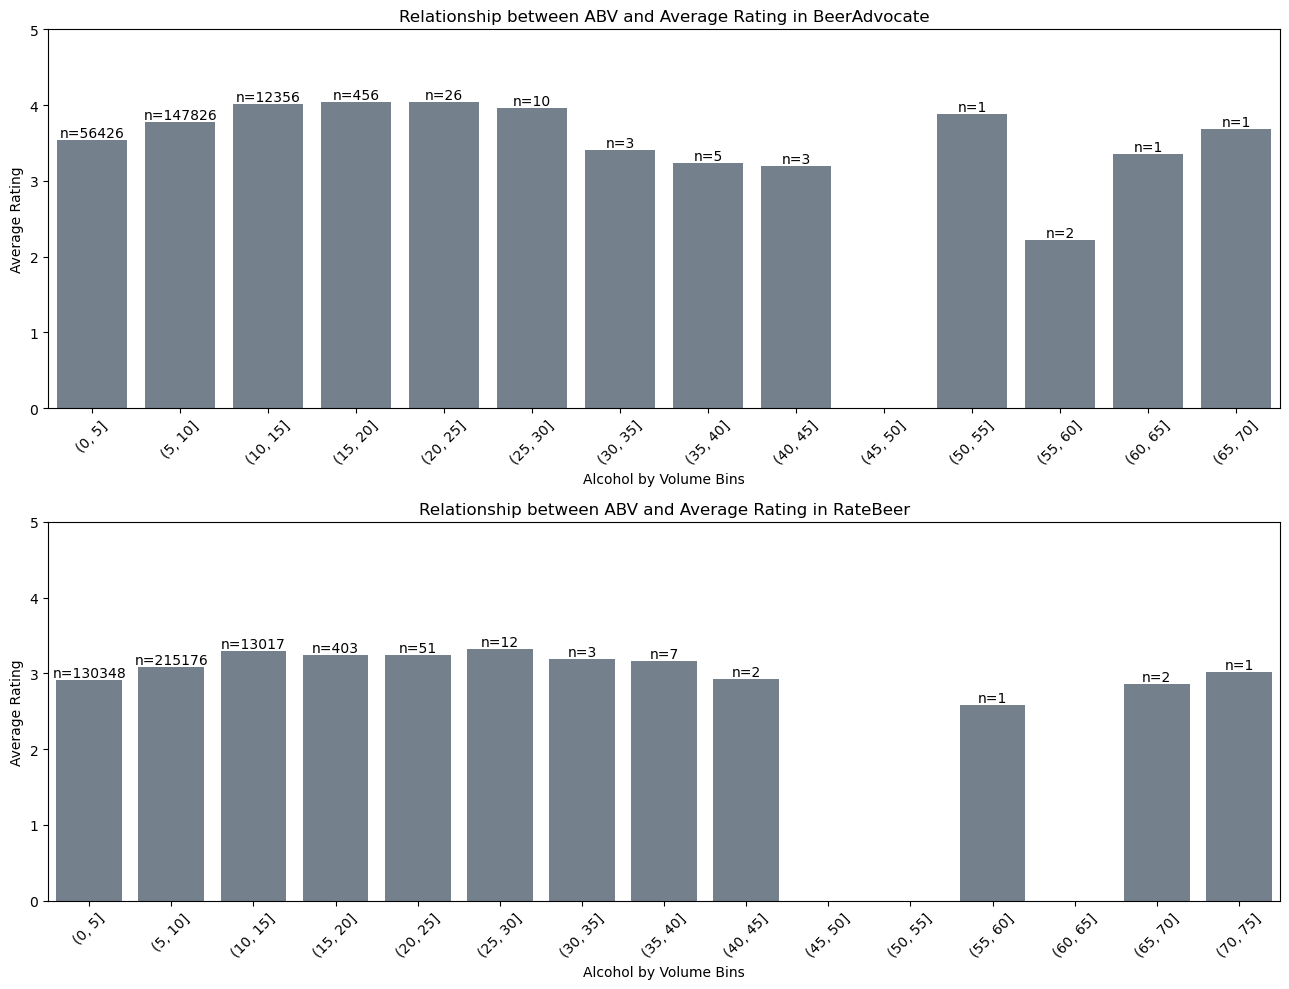

In [31]:
bin_width = 5

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

# BeerAdvocate
df0['abv_bins'] = pd.cut(df0['abv'], bins=range(0, int(df0['abv'].max()) + bin_width, bin_width))
grouped_data = df0.groupby('abv_bins')['avg'].agg(['mean', 'count']).reset_index()
sns.barplot(data=grouped_data, x='abv_bins', y='mean', color='slategray', ax=axes[0])
axes[0].set_ylim(0, 5)
axes[0].set_xlabel('Alcohol by Volume Bins')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Relationship between ABV and Average Rating in BeerAdvocate')
axes[0].tick_params(axis='x', rotation=45)
# Print the number of beers in each abv bin
for i in range(len(grouped_data)):
    axes[0].text(i, grouped_data['mean'][i], f'n={grouped_data["count"][i]}', ha='center', va='bottom')

# RateBeer
df1['abv_bins'] = pd.cut(df1['abv'], bins=range(0, int(df1['abv'].max()) + bin_width, bin_width))
grouped_data = df1.groupby('abv_bins')['avg'].agg(['mean', 'count']).reset_index()
sns.barplot(data=grouped_data, x='abv_bins', y='mean', color='slategray', ax=axes[1])
axes[1].set_ylim(0, 5)
axes[1].set_xlim(-0.5, 14.5)
axes[1].set_xlabel('Alcohol by Volume Bins')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Relationship between ABV and Average Rating in RateBeer')
axes[1].tick_params(axis='x', rotation=45)
# Print the number of beers in each abv bin
for i in range(len(grouped_data)):
    axes[1].text(i, grouped_data['mean'][i], f'n={grouped_data["count"][i]}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Todo: ABV with respect to period of the year ?

### Distribution of the Number of Beers per Breweries

Number of breweries in BeerAdvocate: 14098
Number of breweries in RateBeer: 23183


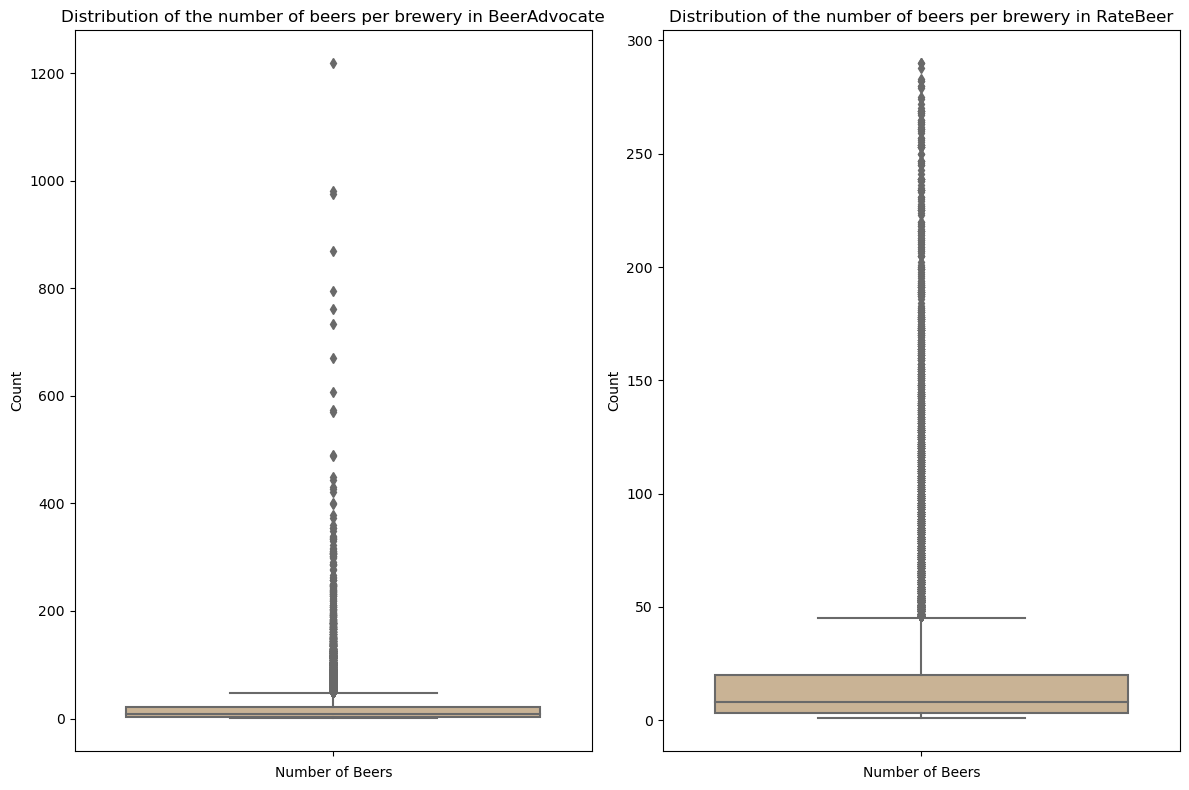

If we zoom in...


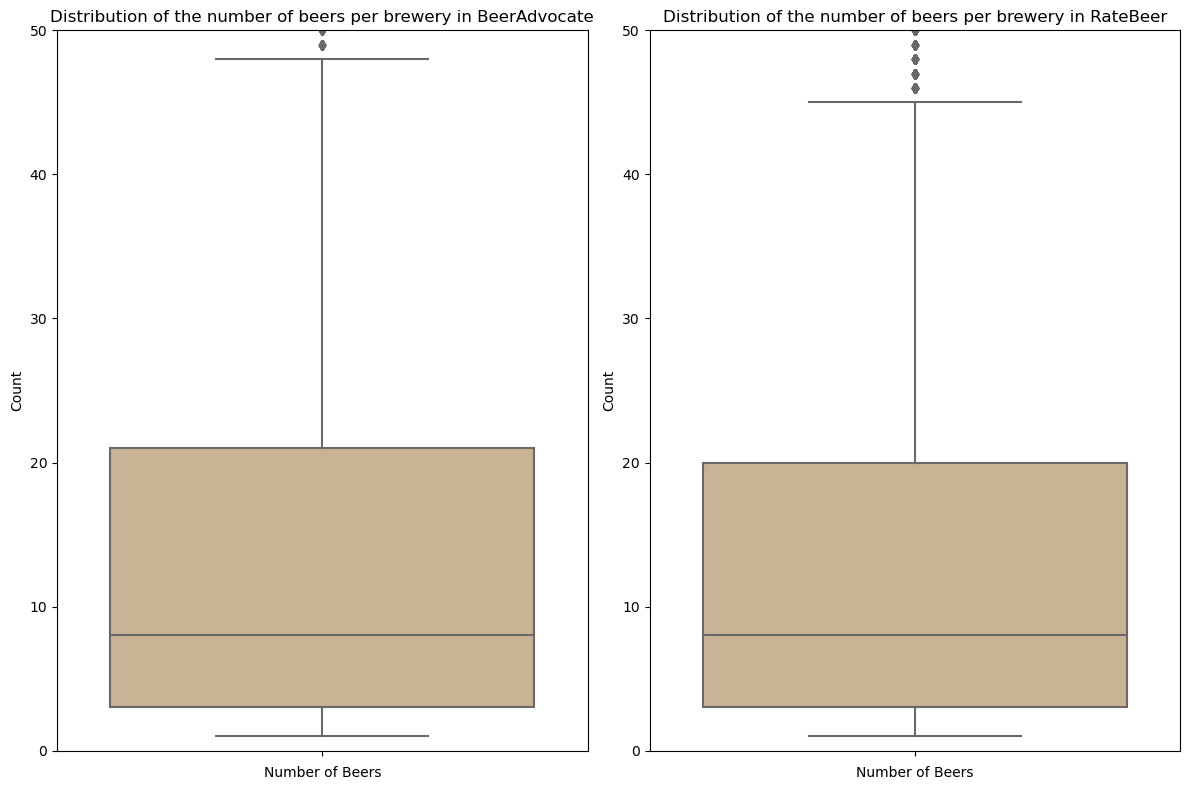

In [32]:
beer_per_brewery_df0 = df0['brewery_name'].value_counts()
beer_per_brewery_df1 = df1['brewery_name'].value_counts()
print(f"Number of breweries in BeerAdvocate: {len(beer_per_brewery_df0)}")
print(f"Number of breweries in RateBeer: {len(beer_per_brewery_df1)}")


# boxplot to show the stats of the beer_per_brewery_df0 and beer_per_brewery_df1
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
sns.boxplot(y=beer_per_brewery_df0.values, ax=axes[0], color='tan')
axes[0].set_xlabel('Number of Beers')
axes[0].set_ylabel('Count')
axes[0].set_title(f'Distribution of the number of beers per brewery in BeerAdvocate')
sns.boxplot(y=beer_per_brewery_df1.values, ax=axes[1], color='tan')
axes[1].set_xlabel('Number of Beers')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Distribution of the number of beers per brewery in RateBeer')
plt.tight_layout()
plt.show()

print("If we zoom in...")
# boxplot to show the stats of the beer_per_brewery_df0 and beer_per_brewery_df1
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
sns.boxplot(y=beer_per_brewery_df0.values, ax=axes[0], color='tan')
axes[0].set_xlabel('Number of Beers')
axes[0].set_ylabel('Count')
axes[0].set_title(f'Distribution of the number of beers per brewery in BeerAdvocate')
axes[0].set_ylim(0, 50)
sns.boxplot(y=beer_per_brewery_df1.values, ax=axes[1], color='tan')
axes[1].set_xlabel('Number of Beers')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Distribution of the number of beers per brewery in RateBeer')
axes[1].set_ylim(0, 50)
plt.tight_layout()
plt.show()



### Top Breweries by Number of Beers

C:\Users\danak\AppData\Local\Temp\ipykernel_13388\1161055166.py:21: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
c:\Users\danak\anaconda3\envs\ada\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


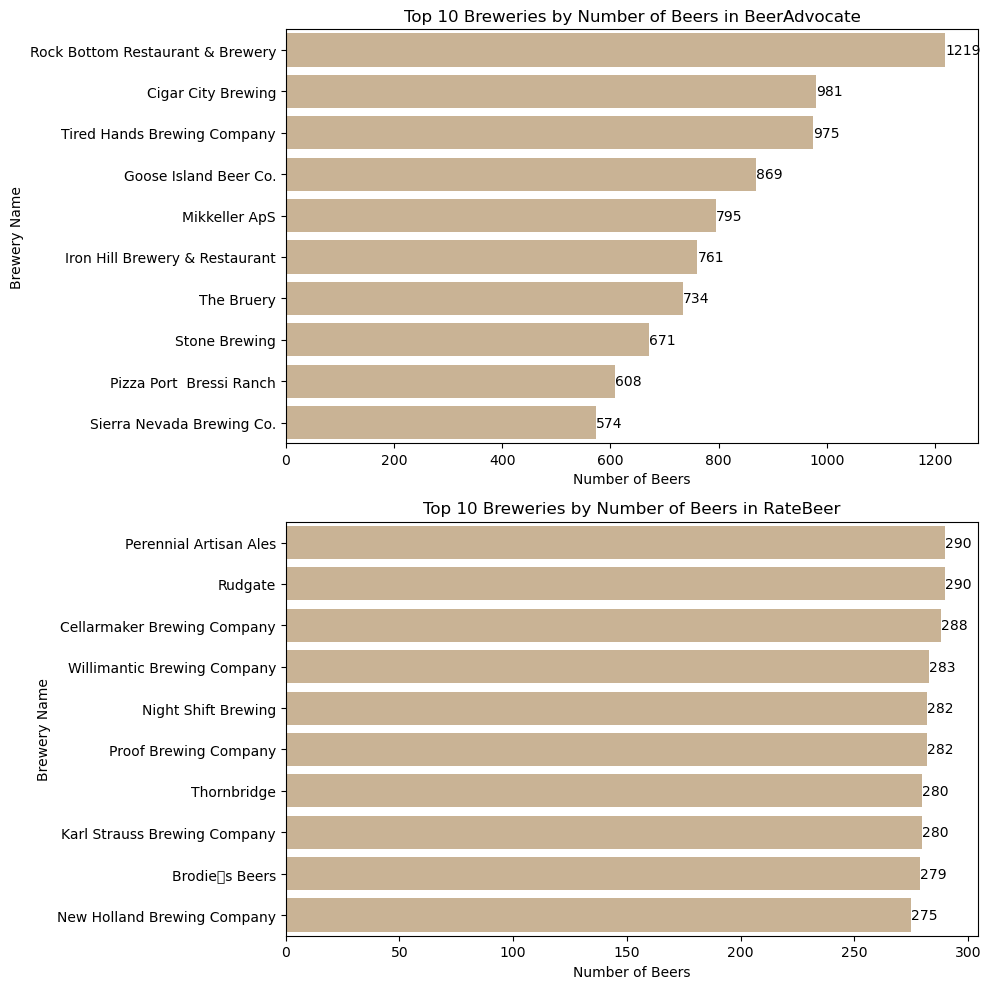

In [33]:
x = 10 # Number of top breweries to plot

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# BeerAdvocate
sns.barplot(y=beer_per_brewery_df0.head(x).index, x=beer_per_brewery_df0.head(x).values, color='tan', ax=axes[0])
axes[0].set_xlabel('Number of Beers')
axes[0].set_ylabel('Brewery Name')
axes[0].set_title(f'Top {x} Breweries by Number of Beers in BeerAdvocate')
for i, count in enumerate(beer_per_brewery_df0.head(x).values):
    axes[0].text(count, i, f'{count}', ha='left', va='center', color='black')

# RateBeer
sns.barplot(y=beer_per_brewery_df1.head(x).index, x=beer_per_brewery_df1.head(x).values, color='tan', ax=axes[1])
axes[1].set_xlabel('Number of Beers')
axes[1].set_ylabel('Brewery Name')
axes[1].set_title(f'Top {x} Breweries by Number of Beers in RateBeer')
for i, count in enumerate(beer_per_brewery_df1.head(x).values):
    axes[1].text(count, i, f'{count}', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


We see that the top 10 breweries most present in RateBeers are different than those in AdvocateBeer.
The distribution of beers per brewery is similar across the two datasets but there is a big difference between them when it comes to the outliers (being the most represented breweries). The number of beers present from the top 10 breweries in AdvocateBeers is by far bigger than the top 1 in RateBeer even though we have almost twice as much beer data in it.

### Difference in the ranking of beer style between average score, ba score, and bros score in BeerAdvocate

After doing this I realised it's useless but here it is

Number of rows that have an average rating value: 247994
Number of rows that have a BA Score value: 61200
Number of rows that have a Bros Score value: 5702


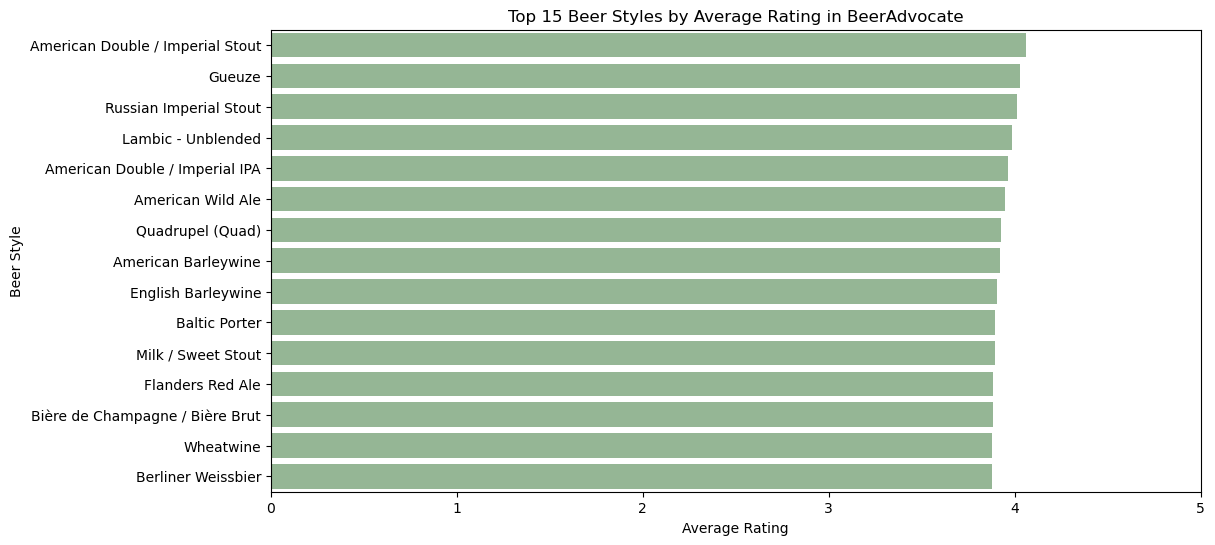

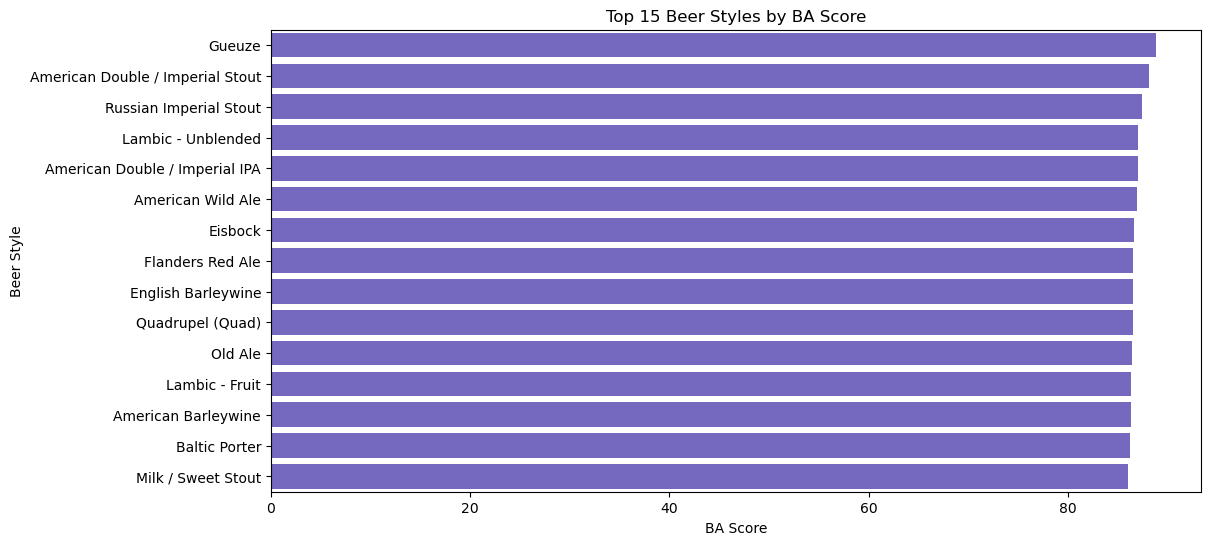

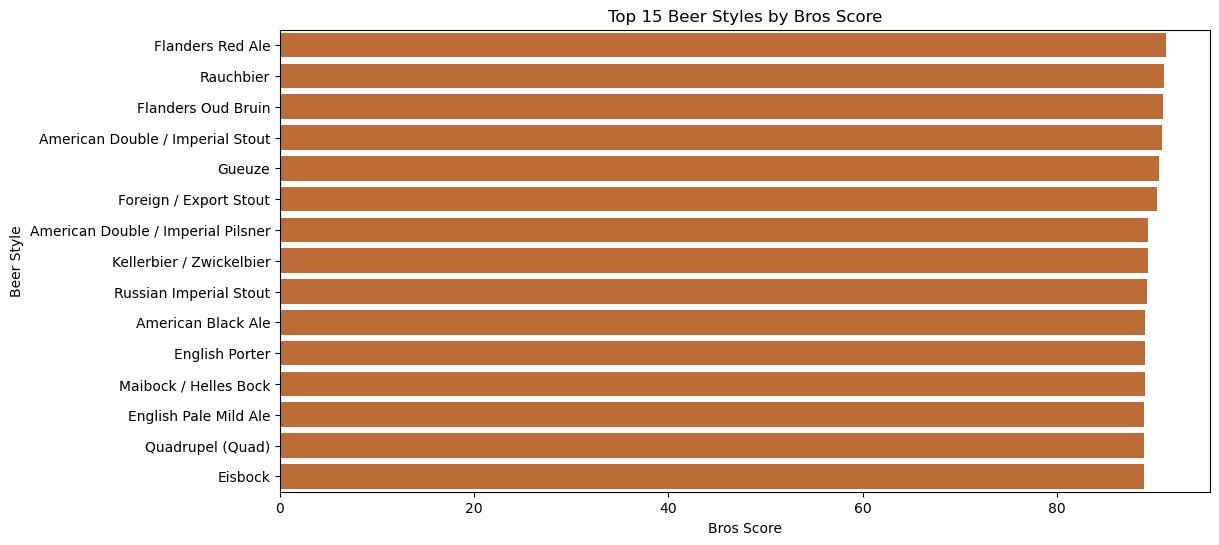

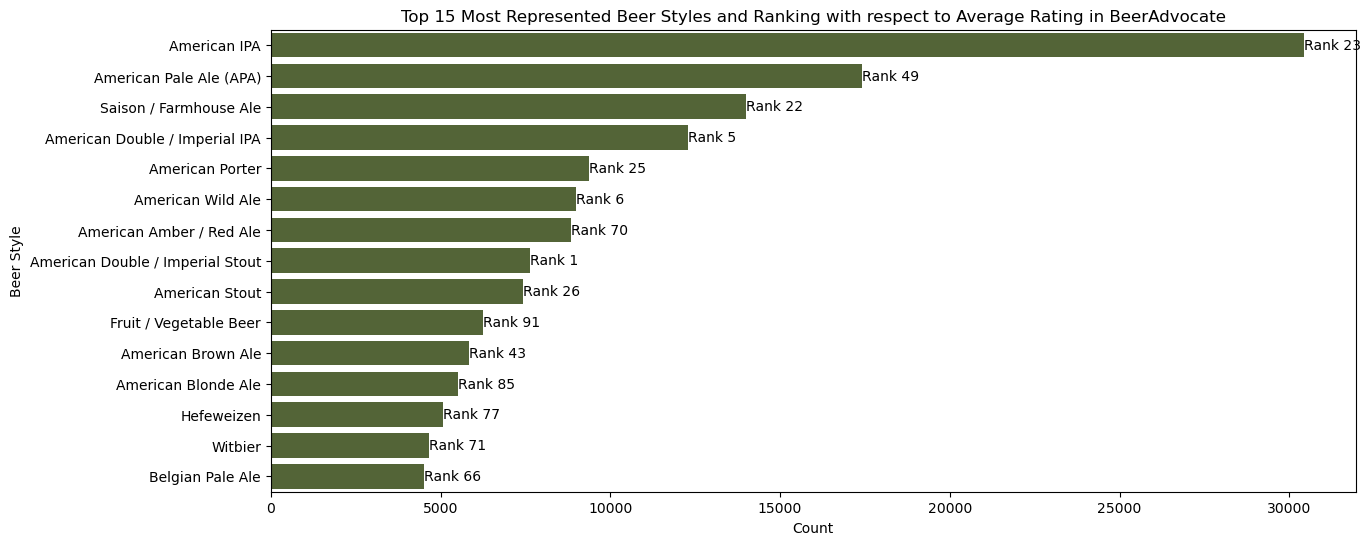

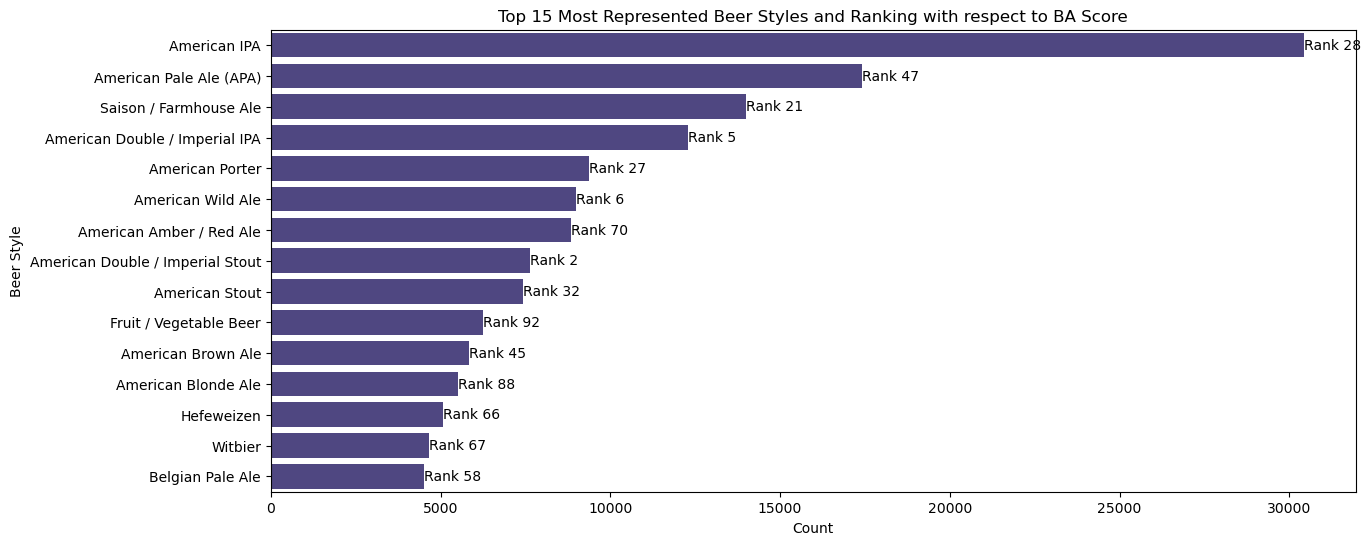

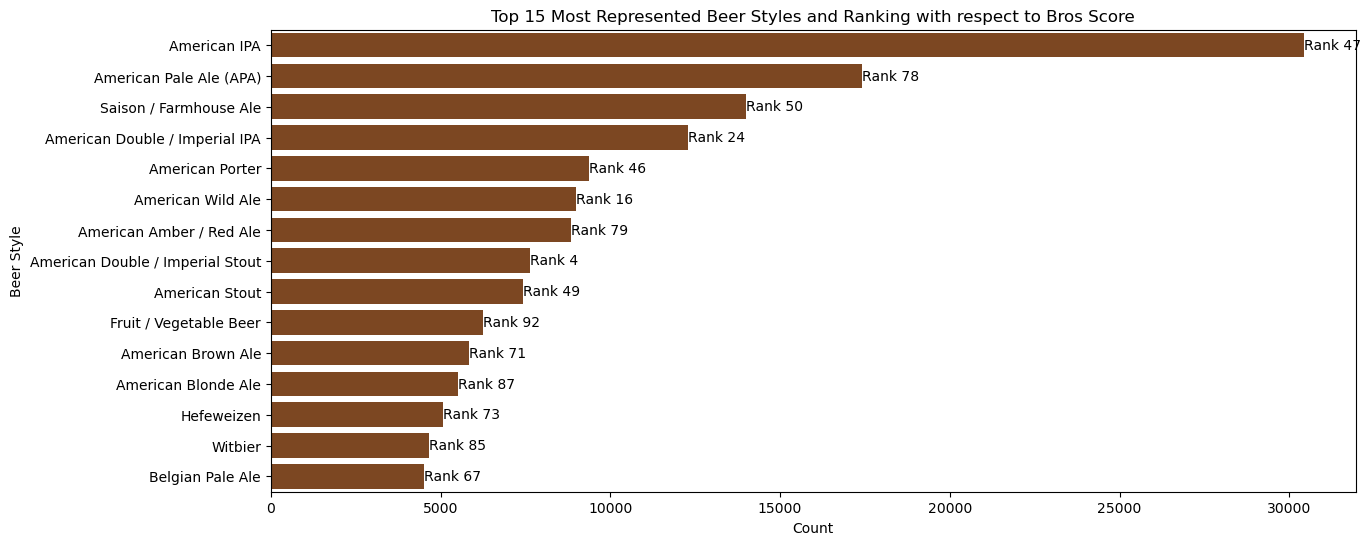

In [34]:
#number of rows in df0['b_score'] not nan
print(f"Number of rows that have an average rating value: " + str(df0['avg'].count()))
print(f"Number of rows that have a BA Score value: " + str(df0['ba_score'].count()))
print(f"Number of rows that have a Bros Score value: " + str(df0['bros_score'].count()))

# Top x Beer Styles by Average Rating
avg_ratings_by_style_df0 = df0.groupby('style')['avg'].mean().sort_values(ascending=False)
x = 15 # Number of top beer styles to plot
plt.figure(figsize=(12, 6))
sns.barplot(y=avg_ratings_by_style_df0.head(x).index, x=avg_ratings_by_style_df0.head(x).values, color='darkseagreen')
plt.xlim(0, 5)
plt.xlabel('Average Rating')
plt.ylabel('Beer Style')
plt.title(f'Top {x} Beer Styles by Average Rating in BeerAdvocate')
plt.show()

# Top x Beer Styles by BA Score
ba_score_by_style = df0.groupby('style')['ba_score'].mean().sort_values(ascending=False)
x = 15 # Number of top beer styles to plot
plt.figure(figsize=(12, 6))
sns.barplot(y=ba_score_by_style.head(x).index, x=ba_score_by_style.head(x).values, color='slateblue')
plt.xlabel('BA Score')
plt.ylabel('Beer Style')
plt.title(f'Top {x} Beer Styles by BA Score')
plt.show()

# Top x Beer Styles by Bros Score
bros_score_by_style = df0.groupby('style')['bros_score'].mean().sort_values(ascending=False)
x = 15 # Number of top beer styles to plot
plt.figure(figsize=(12, 6))
sns.barplot(y=bros_score_by_style.head(x).index, x=bros_score_by_style.head(x).values, color='chocolate')
plt.xlabel('Bros Score')
plt.ylabel('Beer Style')
plt.title(f'Top {x} Beer Styles by Bros Score')
plt.show()

# Top 15 Most Represented Beer Styles and Ranking with respect to Average Rating
plt.figure(figsize=(14, 6))
plot = sns.countplot(y='style', data=df0, order=df0['style'].value_counts().index[:x], color ='darkolivegreen')
for i, style in enumerate(df0['style'].value_counts().index[:x]):
    ranking = avg_ratings_by_style_df0.index.get_loc(style) + 1  
    plot.text(df0['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
plt.xlabel('Count')
plt.ylabel('Beer Style')
plt.title('Top 15 Most Represented Beer Styles and Ranking with respect to Average Rating in BeerAdvocate')
plt.show()

# Top 15 Most Represented Beer Styles and Ranking with respect to BA Score
plt.figure(figsize=(14, 6))
plot = sns.countplot(y='style', data=df0, order=df0['style'].value_counts().index[:15], color ='darkslateblue')
for i, style in enumerate(df0['style'].value_counts().index[:15]):
    ranking = ba_score_by_style.index.get_loc(style) + 1  # Get the ranking (add 1 to start from 1)
    plot.text(df0['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
plt.xlabel('Count')
plt.ylabel('Beer Style')
plt.title('Top 15 Most Represented Beer Styles and Ranking with respect to BA Score')
plt.show()

# Top 15 Most Represented Beer Styles and Ranking with respect to Bros Score
plt.figure(figsize=(14, 6))
plot = sns.countplot(y='style', data=df0, order=df0['style'].value_counts().index[:15], color ='saddlebrown')
for i, style in enumerate(df0['style'].value_counts().index[:15]):
    ranking = bros_score_by_style.index.get_loc(style) + 1  # Get the ranking (add 1 to start from 1)
    plot.text(df0['style'].value_counts()[i], i, f'Rank {ranking}', va='center')
plt.xlabel('Count')
plt.ylabel('Beer Style')
plt.title('Top 15 Most Represented Beer Styles and Ranking with respect to Bros Score')
plt.show()

